# simplified example of gridfinder Dijkstra model

## Before running the notebook

Install the library and its dependencies with, if you haven't done so already
```
pip install -e .
```
from the root directory. You can also execute this command directly in the notebook but will need to reload the
kernel afterwards

In [3]:
# Note - this cell should be executed only once per session
%load_ext autoreload
%autoreload 2

import sys, os

# in order to get the config, it is not part of the library
os.chdir("..")
sys.path.append(os.path.abspath("."))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt
import numpy as np

from gridfinder.post import threshold_distances
from gridfinder.gridfinder import optimise


In [5]:
targets = np.zeros((10, 10))
points = [(0, 0), (3, 5), (1, 7), (9, 9)]
targets[tuple(np.array(points).T)] = 1

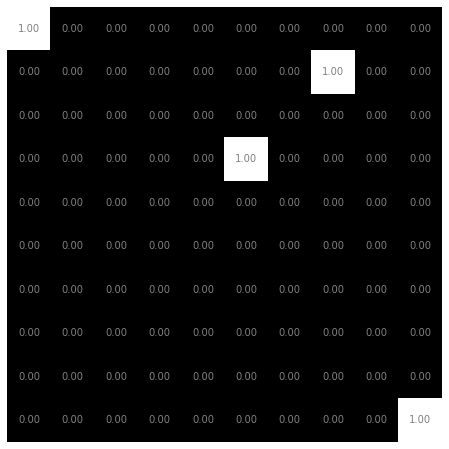

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(targets, cmap='gray')
for (j,i),label in np.ndenumerate(targets):
    ax.text(i,j,f'{label:.2f}', ha='center', va='center', color='gray')
    ax.axis('off')

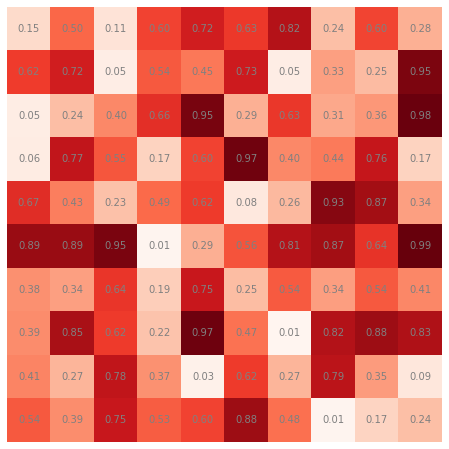

In [7]:
costs = np.random.rand(*targets.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(costs, cmap='Reds')
for (j,i),label in np.ndenumerate(costs):
    ax.text(i,j,f'{label:.2f}', ha='center', va='center', color='gray')
    ax.axis('off')

'96.00 %'

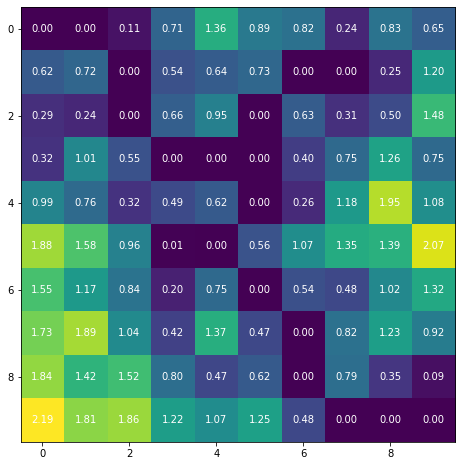

In [8]:
start = points[0]
dist = optimise(targets, costs, start, jupyter=True)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(dist, cmap='viridis')
for (j,i),label in np.ndenumerate(dist):
    ax.text(i, j, f'{label:.2f}', ha='center', va='center', color='white')

(-0.5, 9.5, 9.5, -0.5)

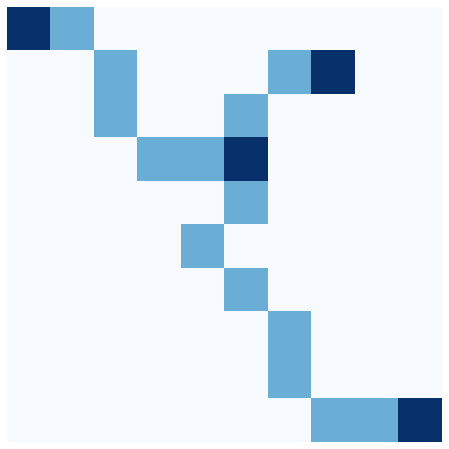

In [9]:
guess = threshold_distances(dist)
guess[tuple(np.array(points).T)] = 2
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(guess, cmap='Blues')
ax.axis('off')